<h1>Data Analysis & Graph Creation<h1

In [ ]:
# Import all the things

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Import excel data into dataframe
file = '../Resources/US_Accidents_May19.csv'    # change to cleaned data set
df = pd.read_csv(file)

# remove this once clean data set is imported

# Clean up data by removing years with incomplete data
df["Start_Year"] = df["Start_Time"].agg(lambda x: x.split("-")[0])

# remove years with incomplete data
df = df[df["Start_Year"] != "2019"]
df = df[df["Start_Year"] != "2015"]

<h2>Make Copy of DataFrame for Analysis<h2

In [2]:
# make copy of data set to use
df_clean_accidents = df # change these lines once clean data set is imported
df_copy = df_clean_accidents # change these lines once clean data set is imported

# initial calculations to be used later
df_years = df_copy.groupby("Start_Year").count()
total_accidents_per_year = df_years["ID"].tolist()

<h2> Traffic Infrastructure Type<h2>

In [11]:
# List of traffic infrastructure based on column title
infrastructure_list = ["Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]

# initialize lists and variables
accident_data_2016 = []
accident_data_2017 = []
accident_data_2018 = []
years = ["2016","2017","2018"]
i = 0

# Loop through traffic infrastructure types and pull out data based on year

for year in years:
    for traffic_type in infrastructure_list:
        if year == "2016":
            accident_data_2016.append(df_copy[traffic_type].loc[(df_copy[traffic_type] == True) & (df_copy["Start_Year"] == year)].count())
        elif year == "2017":
            accident_data_2017.append(df_copy[traffic_type].loc[(df_copy[traffic_type] == True) & (df_copy["Start_Year"] == year)].count())
        elif year == "2018":
            accident_data_2018.append(df_copy[traffic_type].loc[(df_copy[traffic_type] == True) & (df_copy["Start_Year"] == year)].count())
            
# calculate total accidents near traffic infrastructure every year
accident_data_sum = []
accident_data_sum.append(sum(accident_data_2016))
accident_data_sum.append(sum(accident_data_2017))
accident_data_sum.append(sum(accident_data_2018))

# initalize i as 0 for new loop
i = 0
infra_percents = []

# calculate percent of accidents that occur near traffic infrastructure every year
for i in range(0,3):
    infra_percents.append(accident_data_sum[i]/total_accidents_per_year[i])

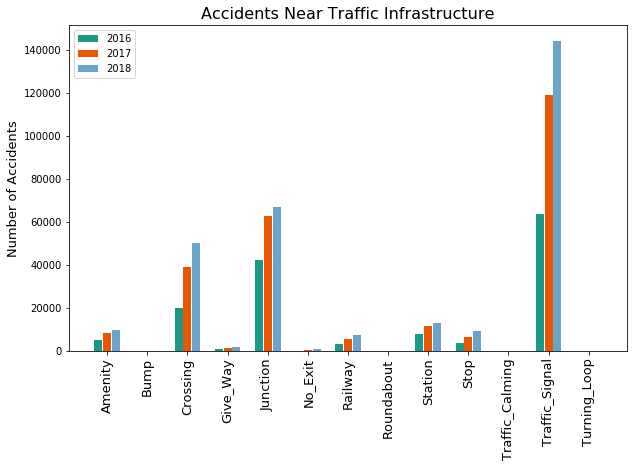

In [4]:
# create graph for accidents near traffic infrastructure

# set up variables to be able to display three sets of data on same graph
x = np.arange(len(infrastructure_list))  # the label locations
width = 0.2  # the width of the bars

# build figures
fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width*1.1, accident_data_2016, width, label='2016',color="#1a9988")
rects2 = ax.bar(x, accident_data_2017, width, label='2017',color="#eb5600")
rects3 = ax.bar(x + width*1.1, accident_data_2018, width, label='2018',color="#6aa4c8")

# label/design/make graph pretty
ax.set_ylabel('Number of Accidents',fontsize=13)
ax.set_title('Accidents Near Traffic Infrastructure',fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(infrastructure_list,fontsize=13)
ax.legend()
plt.xticks(rotation="vertical")
plt.savefig('Accidents_Near_Traffic_Infrastructure.png',bbox_inches="tight")

<h2>Road Type<h2>

In [12]:
# convert street name to list
street_types = ["I-","State Route","Fwy","US-","Pike","CA-","Hwy"]

# include Local roads as last street type
all_street_types = ["I-","State Route","Fwy","US-","Pike","CA-","Hwy","Local Road"]

# initalize lists/variables
streets_2016 = []
streets_2017 = []
streets_2018 = []
i = 0

# count accidents per street type grouped by year
for year in years:
    for street_type in street_types:
        if year == "2016":
            streets_2016.append(df_copy["Street"].loc[(df_copy["Street"].str.contains(street_type)==True) & (df_copy["Start_Year"] == year)].count())
        elif year == "2017":
            streets_2017.append(df_copy["Street"].loc[(df_copy["Street"].str.contains(street_type)==True) & (df_copy["Start_Year"] == year)].count())
        elif year == "2018":
            streets_2018.append(df_copy["Street"].loc[(df_copy["Street"].str.contains(street_type)==True) & (df_copy["Start_Year"] == year)].count())

# calculate local road incidents by assuming they are all noncounted incidents so far
streets_2016.append(total_accidents_per_year[0]-sum(streets_2016))
streets_2017.append(total_accidents_per_year[1]-sum(streets_2017))
streets_2018.append(total_accidents_per_year[2]-sum(streets_2018))

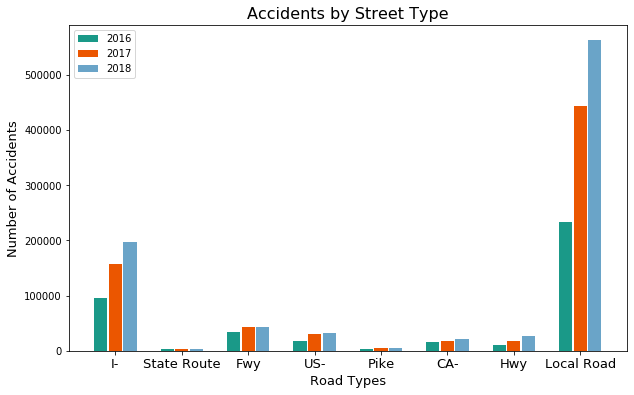

In [6]:
# set up graph parameters for displaying three plots in one
x = np.arange(len(all_street_types))  # the label locations
width = 0.2  # the width of the bars

# create plot
fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width*1.1, streets_2016, width, label='2016',color="#1a9988")
rects2 = ax.bar(x, streets_2017, width, label='2017',color="#eb5600")
rects3 = ax.bar(x + width*1.1, streets_2018, width, label='2018',color="#6aa4c8")

# label/make graph pretty
ax.set_ylabel('Number of Accidents',fontsize=13)
ax.set_title('Accidents by Street Type',fontsize=16)
ax.set_xlabel('Road Types',fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(all_street_types,fontsize=13)
ax.legend()
plt.savefig('Accidents_by_Street_Type.png',bbox_inches="tight")

In [7]:
# calculate percents of accidents on freeway/highway roads

percent_2016 = (sum(streets_2016)-streets_2016[-1])/sum(streets_2016)
percent_2017 = (sum(streets_2017)-streets_2017[-1])/sum(streets_2017)
percent_2018 = (sum(streets_2018)-streets_2018[-1])/sum(streets_2018)

<h2>Cardinal Direction<h2>

In [13]:
# initialize variables
north_stats = 0
south_stats = 0
west_stats = 0
east_stats = 0
northeast_stats = 0
northwest_stats = 0
southeast_stats = 0
southwest_stats = 0
i = 0

# Loop through street column and look for road direction at end of string
for i in range(len(df_copy)):
    
    # get specific cell
    street_name = df_copy.iloc[i,13]
    
    # count based on if the cell has a direction at end of string
    if street_name[-2:] == " N":
        north_stats = north_stats + 1
    elif street_name[-2:] == " S":
        south_stats = south_stats + 1
    elif street_name[-2:] == " W":
        west_stats = west_stats + 1
    elif street_name[-2:] == " E":
        east_stats = east_stats + 1
    if street_name[-3:] == " NE":
        northeast_stats = northeast_stats + 1
    elif street_name[-3:] == " NW":
        northwest_stats = northwest_stats + 1
    elif street_name[-3:] == " SE":
        southeast_stats = southeast_stats + 1
    elif street_name[-3:] == " SW":
        southwest_stats = southwest_stats + 1

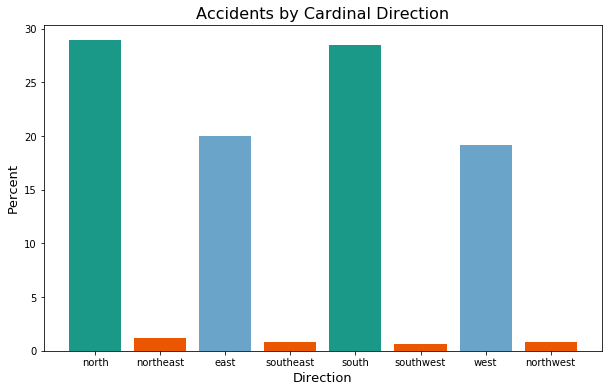

In [9]:
# create bar graph

# create list of numbers per direction and then calculate percents for each
x = [north_stats,northeast_stats,east_stats,southeast_stats,south_stats,southwest_stats,west_stats,northwest_stats]
total_directions = sum(x)
percents = [(i/total_directions)*100 for i in x]

# set up labels for graph
labels = ["north","northeast","east","southeast","south","southwest","west","northwest"]

# create graph/make pretty
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(labels,percents,color=["#1a9988","#eb5600","#6aa4c8","#eb5600","#1a9988","#eb5600","#6aa4c8","#eb5600"])
ax.set_ylabel("Percent",fontsize=13)
ax.set_title("Accidents by Cardinal Direction",fontsize=16)
ax.set_xlabel("Direction",fontsize=13)
plt.savefig('Accidents_by_Direction_bar.png',bbox_inches="tight")

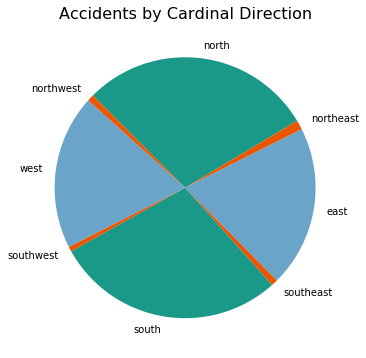

In [10]:
#create pie chart to go with bar chart of cardinal directions
fig, ax = plt.subplots(figsize = (10,6))
ax.pie(x,labels=labels,counterclock=False,startangle=135,colors=["#1a9988","#eb5600","#6aa4c8","#eb5600","#1a9988","#eb5600","#6aa4c8","#eb5600"])
ax.set_title("Accidents by Cardinal Direction",fontsize=16)
plt.savefig('Accidents_by_Direction_pie.png',bbox_inches="tight")